## Quick runthrough to determine if there is a relationship between revenue and sustainable markekting and claims

In [4]:
# read in csv and import data 
import csv 
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt


sales = pd.read_csv('/Users/JohnWishart/Desktop/Case3SalesProducts.csv')

# Clean data

In [5]:
# clean data
sales = sales.dropna()
sales = sales.drop_duplicates()
# lowercase everything
sales = sales.apply(lambda x: x.astype(str).str.lower())
# lower case column names
sales.columns = sales.columns.str.lower()
#get rid of spaces
sales = sales.apply(lambda x: x.astype(str).str.strip())
# make values in columns: year, sustainableclaim, sustainablemarketing, reveneue, quantity, and grossmargin numeric
sales['year'] = pd.to_numeric(sales['year'])
sales['sustainableclaim'] = pd.to_numeric(sales['sustainableclaim'])
sales['sustainablemarketing'] = pd.to_numeric(sales['sustainablemarketing'])
sales['revenue'] = pd.to_numeric(sales['revenue'])
sales['quantity'] = pd.to_numeric(sales['quantity'])
sales['grossmargin'] = pd.to_numeric(sales['grossmargin'])
# make values in columns: country, ordermethod, retailertype, productline, producttype, product categorical
sales['country'] = sales['country'].astype('category')
sales['ordermethod'] = sales['ordermethod'].astype('category')
sales['retailertype'] = sales['retailertype'].astype('category')
sales['productline'] = sales['productline'].astype('category')
sales['producttype'] = sales['producttype'].astype('category')
sales['product'] = sales['product'].astype('category')
# delete ordermethod column
del sales['ordermethod']



In [6]:
# rename variables in quarter from q1 2012 to 1 
# rename variables in quarter from q2 2012 to 2
# rename variables in quarter from q3 2012 to 3
# rename variables in quarter from q4 2012 to 4
sales = sales.replace({'quarter': {'q1 2012': 1, 'q2 2012': 2, 'q3 2012': 3, 'q4 2012': 4}})


In [26]:
sales.head()

,country,retailertype,productline,producttype,product,year,quarter,sustainableclaim,sustainablemarketing,revenue,quantity,grossmargin
0,united states,outdoors shop,camping equipment,cooking gear,trailchef deluxe cook set,2012,1,1,0,59628.66,489,0.347548
1,united states,outdoors shop,camping equipment,cooking gear,trailchef double flame,2012,1,0,1,35950.32,252,0.474274
2,united states,outdoors shop,camping equipment,tents,star dome,2012,1,1,0,89940.48,147,0.352772
3,united states,outdoors shop,camping equipment,tents,star gazer 2,2012,1,1,0,165883.41,303,0.282938
4,united states,outdoors shop,camping equipment,sleeping bags,hibernator lite,2012,1,1,0,119822.20,1415,0.291450


# Exploratory Data Analysis

In [7]:
# create new dataframe with only 2014 data
sales2014 = sales[sales['year'] == 2014]


count    8.789400e+04
mean     4.292014e+04
std      6.590939e+04
min      1.569000e+01
25%      8.363093e+03
50%      2.127053e+04
75%      5.073940e+04
max      1.635688e+06
Name: revenue, dtype: float64


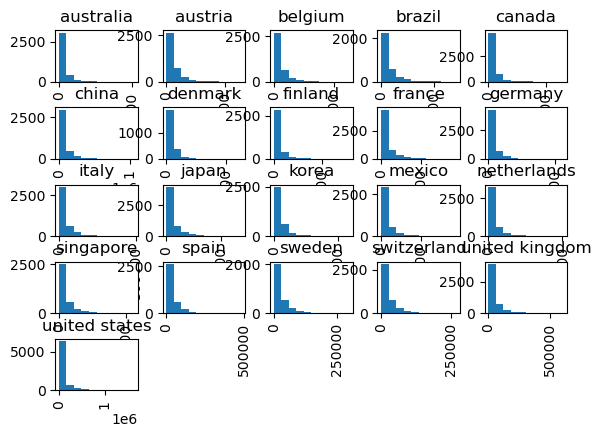

In [8]:
# create histogram of revenue by country
sales['revenue'].hist(by=sales['country'])
print(sales['revenue'].describe())


In [9]:
# summary statistics for revenue by country
sales.groupby('country')['revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
australia,3639.0,30035.715620,41681.235848,86.64,6701.8200,16299.660,36766.9600,516135.14
austria,3823.0,29653.836163,34385.794153,68.59,7036.7900,17866.040,38898.1300,321202.98
belgium,3687.0,26297.415218,31742.547349,27.00,6243.8550,15072.200,33887.4400,310499.39
brazil,3273.0,33322.844925,40307.828240,117.00,7619.5500,18690.430,43672.5400,352749.39
canada,5904.0,41817.016408,54508.150188,75.00,9113.7000,23492.600,52431.6600,648467.60
china,3639.0,68376.811358,89655.751339,120.00,14748.0000,36874.000,85941.9400,1058301.46
denmark,2348.0,20399.715473,22681.995838,63.00,5835.0000,13193.050,27554.3700,313721.10
finland,3393.0,44863.537686,63527.730777,78.00,8991.7500,22390.110,53398.5600,770549.32
france,5733.0,38291.233591,51857.545013,70.18,7439.0800,19265.750,46285.6500,472225.66


count    8.789400e+04
mean     4.292014e+04
std      6.590939e+04
min      1.569000e+01
25%      8.363093e+03
50%      2.127053e+04
75%      5.073940e+04
max      1.635688e+06
Name: revenue, dtype: float64


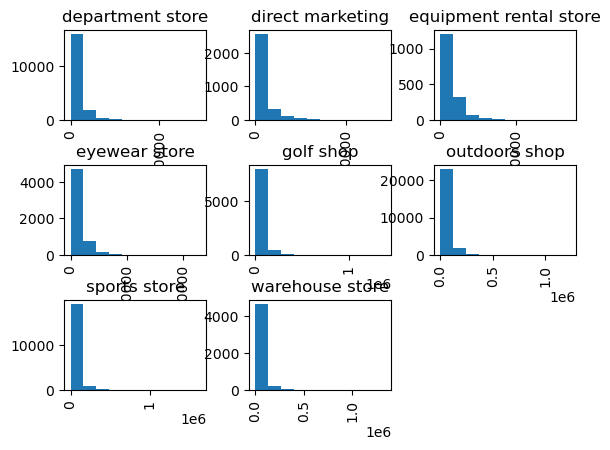

In [10]:
# summary statistics for revenue by retailertype
sales.groupby('retailertype')['revenue'].describe()
# histogram of revenue by retailertype
sales['revenue'].hist(by=sales['retailertype'])
print(sales['revenue'].describe())


count    8.789400e+04
mean     4.292014e+04
std      6.590939e+04
min      1.569000e+01
25%      8.363093e+03
50%      2.127053e+04
75%      5.073940e+04
max      1.635688e+06
Name: revenue, dtype: float64


,count,mean,std,min,25%,50%,75%,max
productline,,,,,,,,
camping equipment,24715.0,50821.376734,73981.846166,70.18,11004.42,26502.00,60133.94,1486717.10
golf equipment,7633.0,75050.113574,91291.232554,92.25,20766.72,46286.19,95180.80,1635687.96
mountaineering equipment,7939.0,51600.974040,61815.524481,1199.52,15880.00,31805.39,63184.14,725496.00
outdoor protection,8354.0,4767.629301,7140.761811,15.69,1145.00,2646.42,5634.75,160956.39
personal accessories,39253.0,38061.452989,57343.610422,109.50,9015.20,20128.12,44190.90,1230450.95


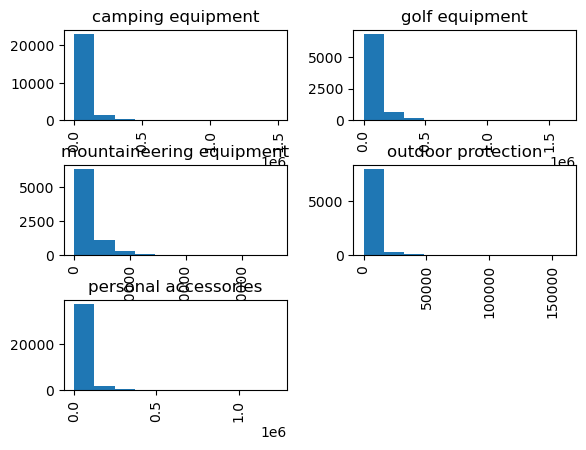

In [11]:
# Create visualizations like histograms, box plots, or density plots to visualize the distribution of numerical variables. This can help identify outliers and skewness
# histogram of revenue by productline
sales['revenue'].hist(by=sales['productline'])
print(sales['revenue'].describe())
# summary statistics for revenue by productline
sales.groupby('productline')['revenue'].describe()


In [14]:
# build data frame with sustainable claim and sustainable marketing
sustainable = sales[['sustainableclaim', 'sustainablemarketing']]
sustainable.head()



,sustainableclaim,sustainablemarketing
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


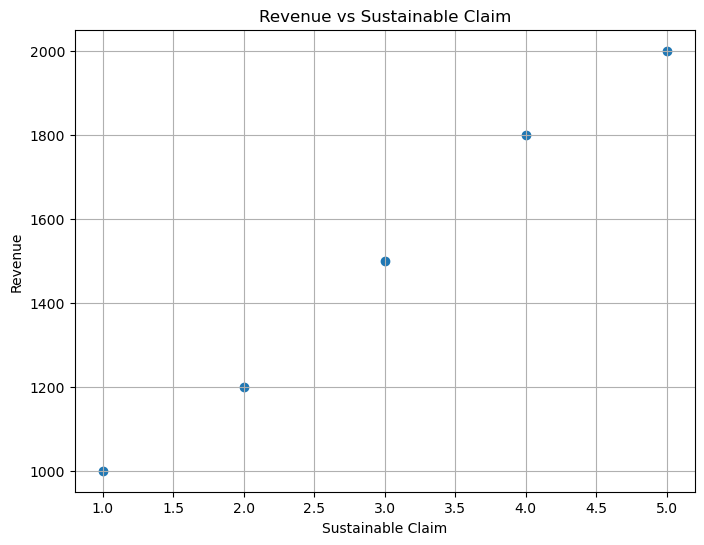

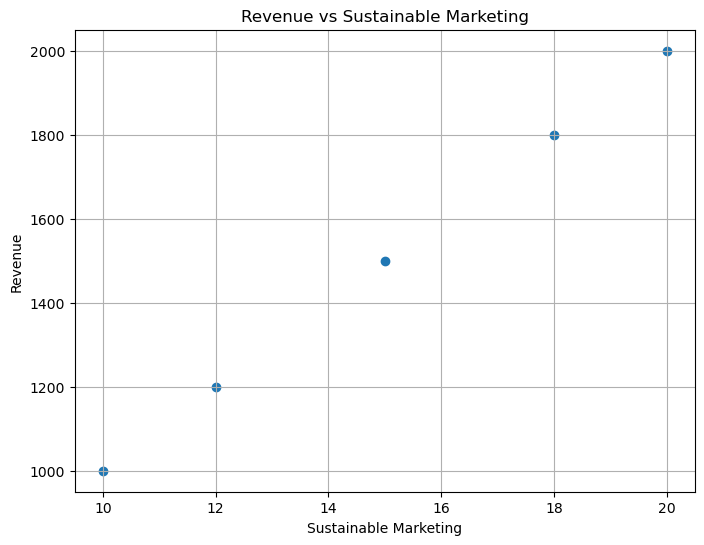

In [19]:
# Use scatter plots or line plots to explore relationships between variables, such as how "Revenue" relates to sustainableclaim and sustainablemarketing
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'sustainableclaim': [1, 2, 3, 4, 5],
    'sustainablemarketing': [10, 12, 15, 18, 20],
    'revenue': [1000, 1200, 1500, 1800, 2000]
}

# Create a DataFrame
sustainable = pd.DataFrame(data)

# Scatter plot of revenue by sustainable claim
plt.figure(figsize=(8, 6))
plt.scatter(sustainable['sustainableclaim'], sustainable['revenue'])
plt.xlabel('Sustainable Claim')
plt.ylabel('Revenue')
plt.title('Revenue vs Sustainable Claim')
plt.grid(True)
plt.show()

# Scatter plot of revenue by sustainable marketing
plt.figure(figsize=(8, 6))
plt.scatter(sustainable['sustainablemarketing'], sustainable['revenue'])
plt.xlabel('Sustainable Marketing')
plt.ylabel('Revenue')
plt.title('Revenue vs Sustainable Marketing')
plt.grid(True)
plt.show()





count    8.789400e+04
mean     4.292014e+04
std      6.590939e+04
min      1.569000e+01
25%      8.363093e+03
50%      2.127053e+04
75%      5.073940e+04
max      1.635688e+06
Name: revenue, dtype: float64
count    87894.000000
mean         0.497508
std          0.499997
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sustainableclaim, dtype: float64
count    87894.000000
mean         0.647689
std          0.477693
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sustainablemarketing, dtype: float64


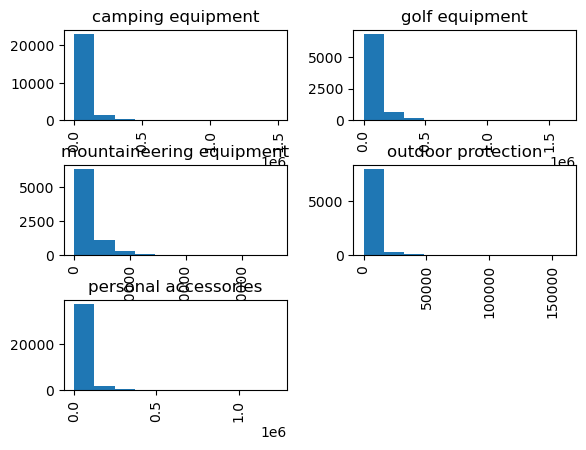

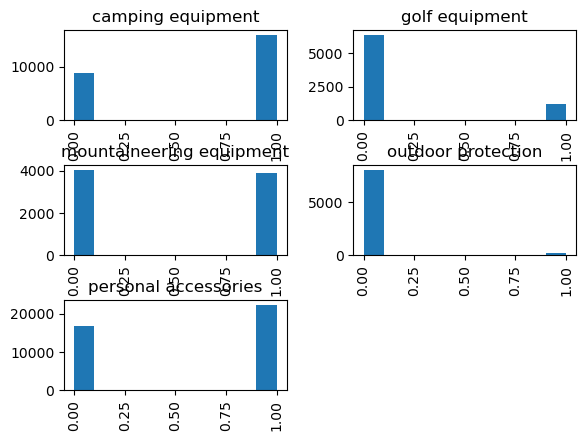

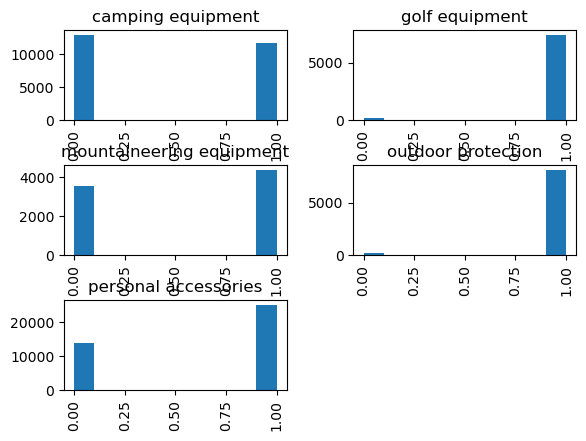

In [20]:
# Investigate productline to see if there is a relationship with revenue and sustainableclaim and sustainablemarketing
# create new dataframe with only productline and revenue
productline = sales[['productline', 'revenue']]
productline.head()
# summary statistics for revenue by productline
productline.groupby('productline')['revenue'].describe()
# histogram of revenue by productline
sales['revenue'].hist(by=sales['productline'])
print(sales['revenue'].describe())
# create new dataframe with only productline and sustainableclaim
productline = sales[['productline', 'sustainableclaim']]
productline.head()
# summary statistics for sustainableclaim by productline
productline.groupby('productline')['sustainableclaim'].describe()
# histogram of sustainableclaim by productline
sales['sustainableclaim'].hist(by=sales['productline'])
print(sales['sustainableclaim'].describe())
# create new dataframe with only productline and sustainablemarketing
productline = sales[['productline', 'sustainablemarketing']]
productline.head()
# summary statistics for sustainablemarketing by productline
productline.groupby('productline')['sustainablemarketing'].describe()
# histogram of sustainablemarketing by productline
sales['sustainablemarketing'].hist(by=sales['productline'])
print(sales['sustainablemarketing'].describe())


# Regression Model

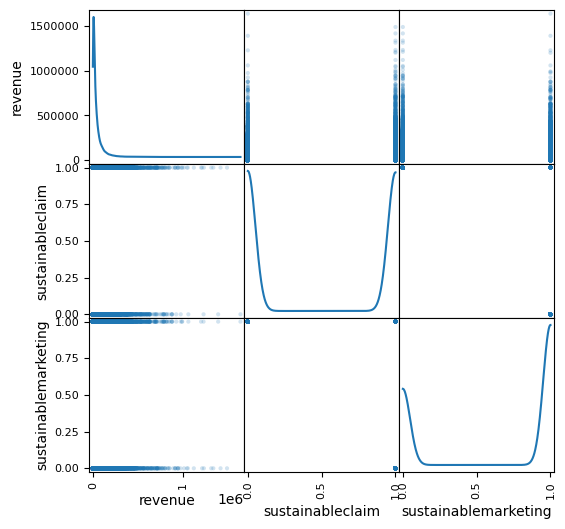

In [21]:
# create regression model to determine if there is a relationship between revenue and sustainableclaim and sustainablemarketing
# create new dataframe with only revenue, sustainableclaim, and sustainablemarketing
revenue = sales[['revenue', 'sustainableclaim', 'sustainablemarketing']]
revenue.head()
# summary statistics for revenue, sustainableclaim, and sustainablemarketing
revenue.describe()
# create scatterplot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(revenue, alpha=0.2, figsize=(6, 6), diagonal='kde')
# create correlation matrix
revenue.corr()







In [23]:
# regression model results
# create linear regression model
import statsmodels.api as sm
X = revenue[['sustainableclaim', 'sustainablemarketing']]
y = revenue['revenue']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
# create linear regression model with interaction term
X = revenue[['sustainableclaim', 'sustainablemarketing']]
y = revenue['revenue']
X['interaction'] = X['sustainableclaim'] * X['sustainablemarketing']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     738.9
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:47:38   Log-Likelihood:            -1.0989e+06
No. Observations:               87894   AIC:                         2.198e+06
Df Residuals:                   87890   BIC:                         2.198e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.433e+14   2.28e+15      0.413      0.679   -3.53e+15    5.42e+15
sustainableclaim     -9.433e+14   2.28e+15     -0.413      0.679   -5.42e+15    3.53e+15
sustainablemarketing -9.433e+14   2.28e+15     -0.413      0.679   -5.42e+15    3.53e+15
interaction           9.433e+14   2.28e+15      0.413      0.679   -3.53e+15    5.42e+15
==============================================================================
Omnibus:                    93189.796   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10037271.178
Skew:                           5.240   Prob(JB):                         0.00
Kurtosis:                      54.292   Cond. No.                     2.74e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Results

R-squared (R^2): The R-squared value measures the goodness of fit of the model. In this case, the R-squared value is 0.025, which means that only 2.5% of the variation in 'revenue' is explained by the independent variables in the model. In other words, the model does not do a very good job of explaining the variability in 'revenue.'

F-statistic: The F-statistic tests the overall significance of the model. In this case, the F-statistic is 738.9, and the associated p-value is 0.00 (Prob (F-statistic)). A low p-value indicates that the model as a whole is statistically significant, suggesting that at least one of the independent variables is related to 'revenue.'

Examining other variables may lead to additional insight for further research.